# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Alejandro Moncada Espinosa

- ID: A01638343

- My carreer: ITC


# Importing libraries

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [142]:
url = './A01638343_X.csv'
df = pd.read_csv(url)

## b) Data managment


Print the first 7 rows

In [143]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,-10.313076,-0.886860,-9.696237,-0.671109,-9.311693,13.583795,-4.756261,8.919876,-10.312017,7.595176,7.279574
1,1,-8.673167,5.605672,-8.770025,-7.166515,-8.260006,-1.358509,-6.239244,3.723601,7.010170,-10.401972,5.180861
2,2,10.574723,-8.503557,-4.380463,0.565428,-11.260016,-5.012109,-7.934823,7.466983,-2.706799,-0.663533,-5.005218
3,3,-7.656683,8.959644,-8.033548,-3.060137,-6.285975,-3.015901,-5.160600,6.356100,8.044868,-9.300053,5.216024
4,4,-8.810910,-3.002453,-9.440427,3.741445,-9.266724,8.446970,-3.334213,6.878722,-9.566826,7.926981,6.274675
5,5,-10.835167,-1.213536,-5.208961,4.457116,-13.161249,13.117189,-2.367113,5.226819,-10.898477,10.914234,5.225812
6,6,1.677385,-7.413306,5.199656,4.672071,1.551102,-7.985702,0.579582,1.204417,-2.191217,9.001732,7.835218


Print the last 4 rows

In [144]:
df.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
720,720,-7.396887,10.310832,-11.332291,-5.575982,-7.973303,-2.720589,-8.468865,2.757298,10.383601,-9.199324,3.012990
721,721,10.534420,-6.984433,-6.372520,-6.282581,-10.895096,-6.589016,-10.666925,8.067974,-2.296767,-1.480557,-6.380546
722,722,11.457256,-9.123153,-5.174858,-2.697162,-7.933061,-6.238480,-7.727426,11.250584,0.556834,-5.789523,-2.494095
723,723,-7.517935,-2.700897,-9.390194,5.200776,-8.432114,9.678626,-5.412864,6.753539,-11.417967,4.901528,8.053370


How many rows and columns are in your data?

Use the `shape` method


In [145]:
print(df.shape)

(724, 12)


Print the name of all columns

Use the `columns` method

In [146]:
print(df.columns)

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11'],
      dtype='object')


What is the data type in each column

Use the `dtypes` method

In [147]:
print(df.dtypes)

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
dtype: object


What is the meaning of rows and columns?

Your responses here

1. Hay 724 observaciones las cuales son las filas

2. Hay 12 columnas las cuales son las variables o caracteristicas que se miden en las observaciones

3. Se podria descartar la columna 'Unnamed: 0' ya que solo cuenta el numero de observacion y eso no es necesario

4. Las columnas x1 a x11 son mediciones decimales y se les debe encontrar que representan

In [148]:
df = df.drop('Unnamed: 0', axis=1)

Print a statistical summary of your columns


In [149]:
summary = df.describe()
print(summary)

               x1          x2          x3          x4          x5          x6  \
count  724.000000  724.000000  724.000000  724.000000  724.000000  724.000000   
mean    -0.904938   -2.387028   -3.730971   -0.454871   -6.200670   -0.233851   
std      7.689008    6.917866    6.578849    5.373834    4.426135    6.066221   
min    -14.868607  -13.952134  -13.742317  -12.938147  -15.354256  -10.511645   
25%     -8.151181   -8.002802   -8.296632   -5.009807   -9.272010   -4.431751   
50%     -2.204432   -4.535684   -6.346831    0.848448   -7.473267   -2.422176   
75%      6.438067    2.841761    0.075937    4.099673   -3.674356    3.074295   
max     13.998157   12.843038   12.234318    9.752586    5.314041   14.683554   

               x7          x8          x9         x10         x11  
count  724.000000  724.000000  724.000000  724.000000  724.000000  
mean    -4.878792    6.099347   -1.253560    0.682387    2.352751  
std      4.676618    3.189347    6.282838    8.233721    4.260832 

1. What is the minumum and maximum values of each variable:

In [150]:
print('Variable   Min   Max')
for obs in summary:
    print(f'{obs}   {summary[obs]["min"]}   {summary[obs]["max"]}')

Variable   Min   Max
x1   -14.86860652672982   13.998157177778788
x2   -13.952133664071004   12.843038489725874
x3   -13.742317485532524   12.234318341964508
x4   -12.93814701005747   9.75258575833659
x5   -15.35425602816566   5.31404052676083
x6   -10.511645277061213   14.683554085170869
x7   -14.471132294825496   6.95621650655969
x8   -2.160293760255467   14.202630363550393
x9   -15.018281012218733   11.582514523511726
x10   -15.094616846163564   14.878206977939406
x11   -8.97595236199816   10.621490138005823


2. What is the mean and standar deviation of each variable:

In [151]:
print('Variable   Mean   Median')
for obs in summary:
    print(f'{obs}   {summary[obs]["mean"]}   {summary[obs]["50%"]}')

Variable   Mean   Median
x1   -0.9049382897864651   -2.2044315997183896
x2   -2.3870277471897574   -4.535684492342557
x3   -3.7309706336240334   -6.3468311926692955
x4   -0.45487125491979025   0.8484476397275709
x5   -6.200670288664982   -7.473266649159165
x6   -0.23385093308817004   -2.422175742404807
x7   -4.878791611982218   -6.159101043530679
x8   6.099347448383381   6.348422936224054
x9   -1.2535597968157237   -1.2638770265464396
x10   0.6823866137282758   2.444145497857811
x11   2.352750741224407   3.393329507664214


3. What the 25%, 50% and 75% represent?:
    - 25%: Es el primer cuartil, significa que el 25% de los valores son menores o iguales a ese valor
    - 50%: Es el segundo cuartil, significa que el 50% de los valores están por debajo y el otro 50% por encima a ese valor
    - 75%: Es el tercer cuartil, significa que el 75% de los valores son menores o iguales a ese valor

Rename the columns using the same name with capital letters

In [152]:
originalColumns = df.columns
capitalizedColumnNames = [i.capitalize() for i in originalColumns]
df = df.rename(columns=dict(zip(df.columns, capitalizedColumnNames)))
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,-10.313076,-0.886860,-9.696237,-0.671109,-9.311693,13.583795,-4.756261,8.919876,-10.312017,7.595176,7.279574
1,-8.673167,5.605672,-8.770025,-7.166515,-8.260006,-1.358509,-6.239244,3.723601,7.010170,-10.401972,5.180861
2,10.574723,-8.503557,-4.380463,0.565428,-11.260016,-5.012109,-7.934823,7.466983,-2.706799,-0.663533,-5.005218
3,-7.656683,8.959644,-8.033548,-3.060137,-6.285975,-3.015901,-5.160600,6.356100,8.044868,-9.300053,5.216024
4,-8.810910,-3.002453,-9.440427,3.741445,-9.266724,8.446970,-3.334213,6.878722,-9.566826,7.926981,6.274675


Rename the columns to their original names

In [153]:
df = df.rename(columns=dict(zip(df.columns, originalColumns)))
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,-10.313076,-0.886860,-9.696237,-0.671109,-9.311693,13.583795,-4.756261,8.919876,-10.312017,7.595176,7.279574
1,-8.673167,5.605672,-8.770025,-7.166515,-8.260006,-1.358509,-6.239244,3.723601,7.010170,-10.401972,5.180861
2,10.574723,-8.503557,-4.380463,0.565428,-11.260016,-5.012109,-7.934823,7.466983,-2.706799,-0.663533,-5.005218
3,-7.656683,8.959644,-8.033548,-3.060137,-6.285975,-3.015901,-5.160600,6.356100,8.044868,-9.300053,5.216024
4,-8.810910,-3.002453,-9.440427,3.741445,-9.266724,8.446970,-3.334213,6.878722,-9.566826,7.926981,6.274675


Use two different alternatives to get one of the columns

In [154]:
print(df.loc[:, "x1"])
print(df.iloc[:, 2])

0     -10.313076
1      -8.673167
2      10.574723
3      -7.656683
4      -8.810910
         ...    
719    -8.762658
720    -7.396887
721    10.534420
722    11.457256
723    -7.517935
Name: x1, Length: 724, dtype: float64
0      -9.696237
1      -8.770025
2      -4.380463
3      -8.033548
4      -9.440427
         ...    
719    -9.561084
720   -11.332291
721    -6.372520
722    -5.174858
723    -9.390194
Name: x3, Length: 724, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [155]:
secondAndThirdColumns = df.iloc[62:73, 1:3]
secondAndThirdColumns

,x2,x3
62,-6.709335,7.926081
63,-11.114697,-5.800345
64,-4.456568,7.977836
65,-0.676919,-3.390877
66,-5.237926,-3.831270
67,8.808307,-6.789378
68,10.096867,-9.273897
69,6.169256,-8.794451
70,-4.253721,-7.549966
71,-8.683661,4.578245


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [156]:
total_rows = secondAndThirdColumns.shape[0]

null_values_x2 = secondAndThirdColumns['x2'].isnull().sum()
not_null_values_x2 = secondAndThirdColumns['x2'].notnull().sum()

null_values_x3 = secondAndThirdColumns['x3'].isnull().sum()
not_null_values_x3 = secondAndThirdColumns['x3'].notnull().sum()

sum_x2 = null_values_x2 + not_null_values_x2
sum_x3 = null_values_x3 + not_null_values_x3

print(f'Total rows: {total_rows}')
print(f'x2. Null values: {null_values_x2}    Not null values: {not_null_values_x2}    Total: {sum_x2}')
print(f'x3. Null values: {null_values_x3}    Not null values: {not_null_values_x3}    Total: {sum_x3}')

Total rows: 11
x2. Null values: 0    Not null values: 11    Total: 11
x3. Null values: 0    Not null values: 11    Total: 11


Discard the last column


In [157]:
secondAndThirdColumns = secondAndThirdColumns.drop(secondAndThirdColumns.columns[-1], axis=1)
secondAndThirdColumns.head()

,x2
62,-6.709335
63,-11.114697
64,-4.456568
65,-0.676919
66,-5.237926


### Questions

Based on the previos results, provide a full description of yout dataset

Your response:

Con lo que se realizo anteriormente pude observar que los datos son valores decimales los cuales no se encontraron valores nulos en el subconjunto realizado




## c) Data visualization

Plot in the histogram of one of the variables

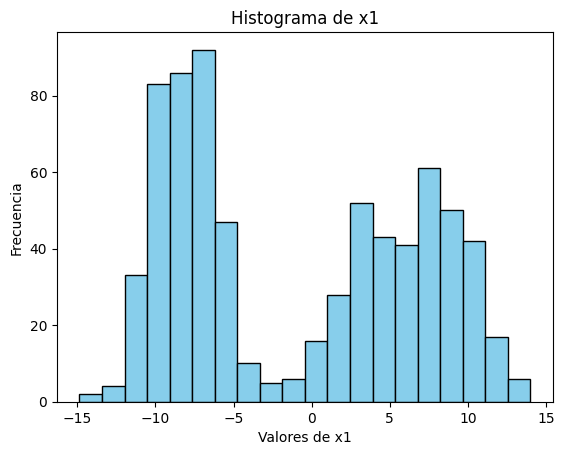

In [158]:
plt.hist(df['x1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de x1')
plt.xlabel('Valores de x1')
plt.ylabel('Frecuencia')
plt.show()

Plot in the same figure the histogram of two variables



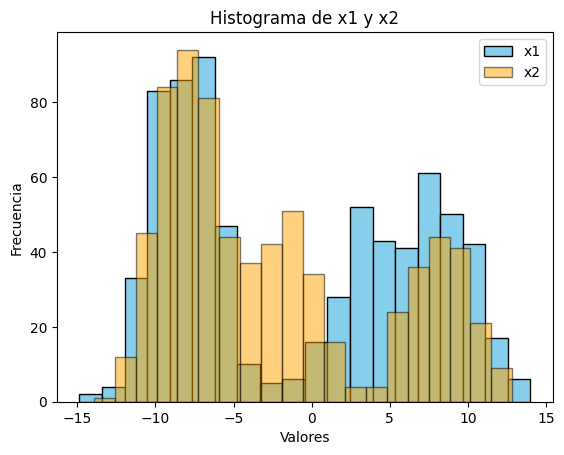

In [159]:
plt.hist(df['x1'], bins=20, color='skyblue', edgecolor='black', label='x1', alpha=1)
plt.hist(df['x2'], bins=20, color='orange', edgecolor='black', label='x2', alpha=0.5)
plt.title('Histograma de x1 y x2')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Los valores de las dos columnas son entre -15, y 15 y los minimos de la frequencia de los datos son de 1 a 90.
Esto nos quiere decir que son valores volatiles entre ese rango de numeros los cuales una gran cantidad de veces se repiten.

Plot the boxplot of one of the variables

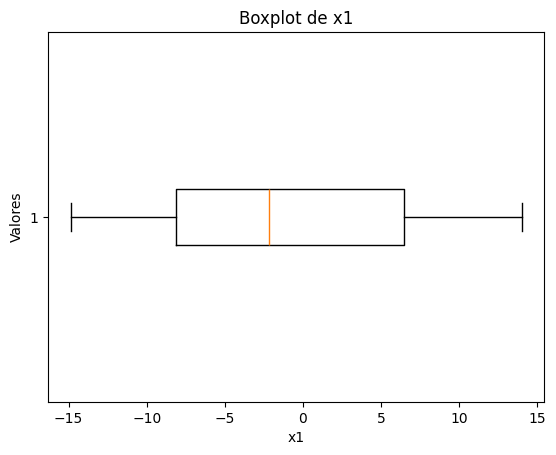

In [160]:
plt.boxplot(df['x1'], vert=False)  # Boxplot horizontal
plt.title('Boxplot de x1')
plt.xlabel('x1')
plt.ylabel('Valores')
plt.show()

Plot in the same figure the boxplot of two variables

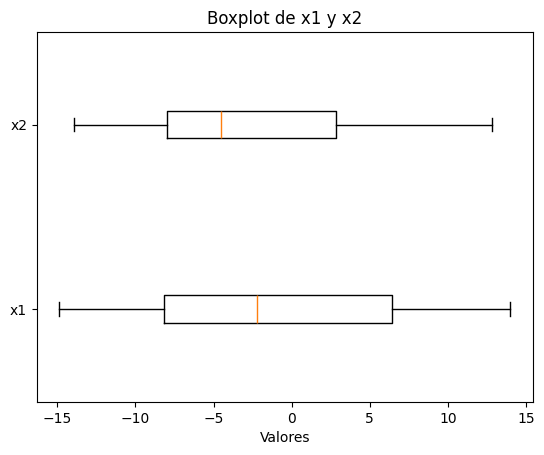

In [161]:
plt.boxplot([df['x1'], df['x2']], vert=False, tick_labels=['x1', 'x2'])  # boxplot horizontal
plt.title('Boxplot de x1 y x2')
plt.xlabel('Valores')
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Se puede observar que en los dos casos se tienen valores atipicos desde el -15 al -8.

Que en los dos el 50% de los datos inicia en -8 y termina uno en 3 y el otro en 6.

Y que se vuelven a presentar valores atipicos del 3 al 15 en el primer caso y 6 al 15 en el segundo caso.

Plot the scatter plot between all pair of variables

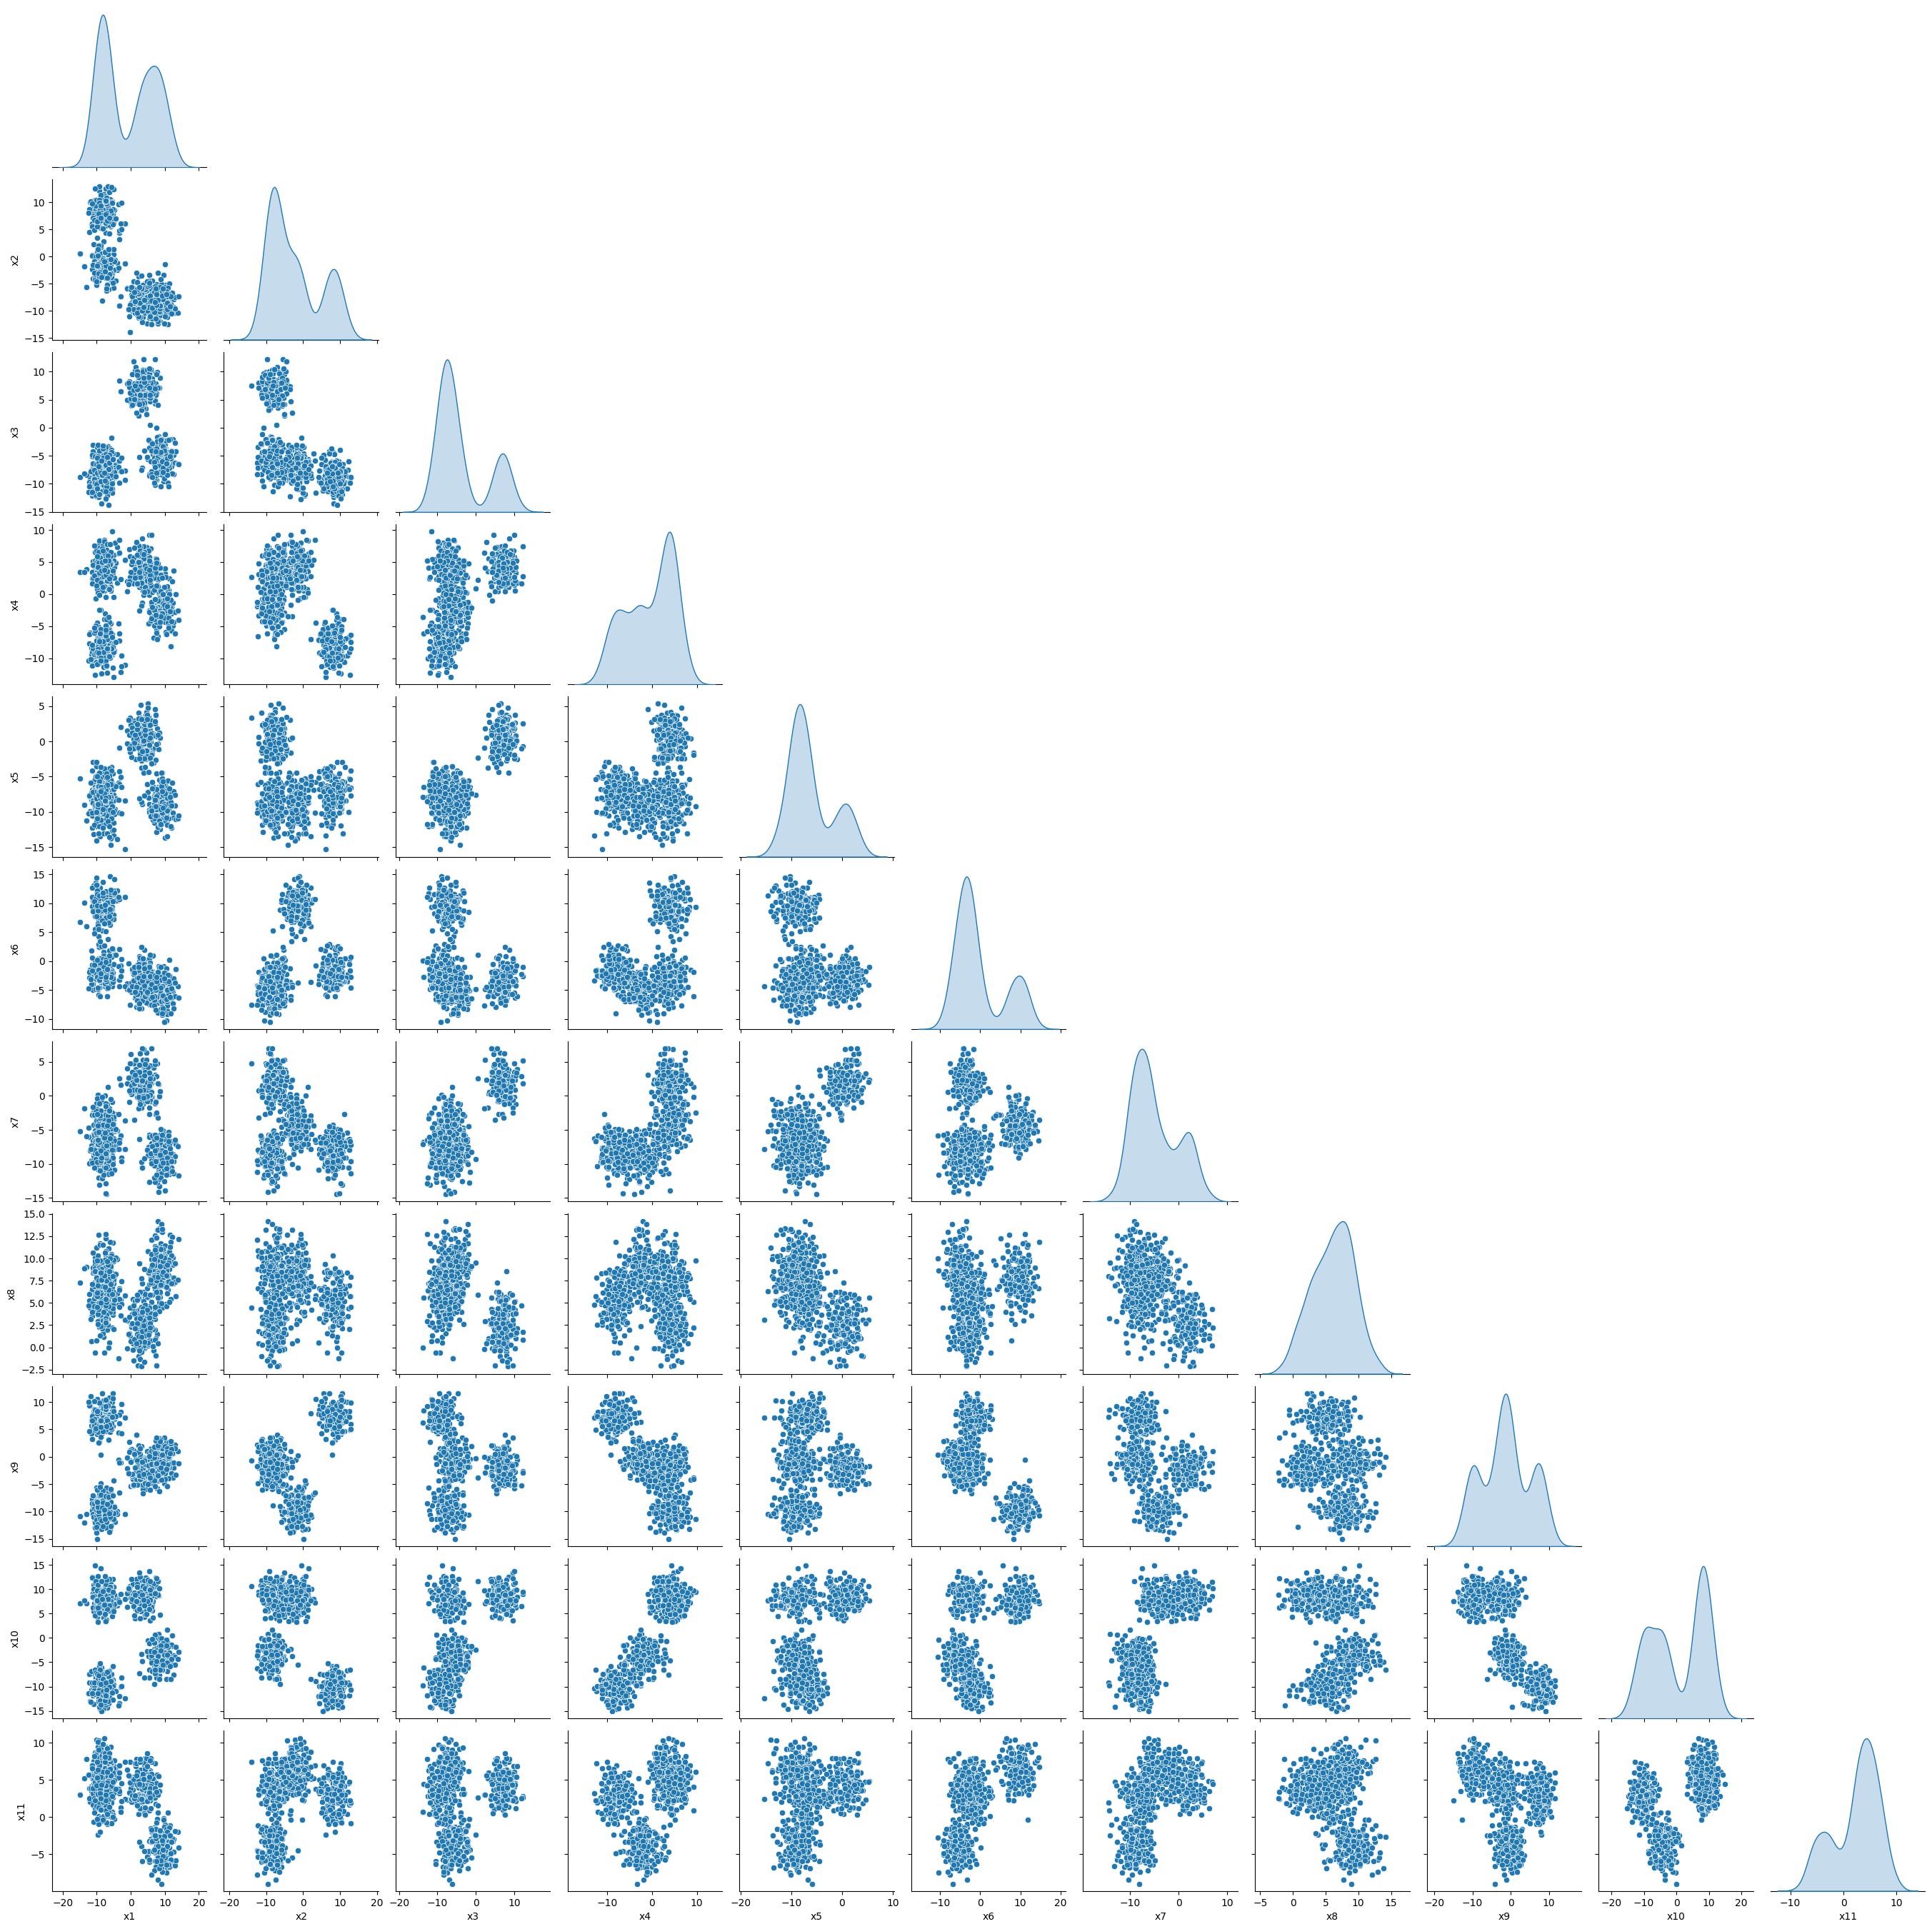

In [162]:
g = sns.pairplot(df, corner=True, diag_kind="kde")
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:

Usando las graficas puedo observar que la mayoria tiende a tener conjuntos de 2 hasta 4 conjuntos notables.


## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [163]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, n_init="auto", random_state=42)

Cluster1 = km.fit_predict(df[['x1', 'x2']])

Add to your dataset a column with the estimated cluster to each data point

In [164]:
df['Cluster'] = Cluster1
print(df.head())

          x1        x2        x3        x4         x5         x6        x7  \
0 -10.313076 -0.886860 -9.696237 -0.671109  -9.311693  13.583795 -4.756261   
1  -8.673167  5.605672 -8.770025 -7.166515  -8.260006  -1.358509 -6.239244   
2  10.574723 -8.503557 -4.380463  0.565428 -11.260016  -5.012109 -7.934823   
3  -7.656683  8.959644 -8.033548 -3.060137  -6.285975  -3.015901 -5.160600   
4  -8.810910 -3.002453 -9.440427  3.741445  -9.266724   8.446970 -3.334213   

         x8         x9        x10       x11  Cluster  
0  8.919876 -10.312017   7.595176  7.279574        1  
1  3.723601   7.010170 -10.401972  5.180861        2  
2  7.466983  -2.706799  -0.663533 -5.005218        0  
3  6.356100   8.044868  -9.300053  5.216024        2  
4  6.878722  -9.566826   7.926981  6.274675        1  


Print the number associated to each cluster

In [165]:
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    186
1    182
2    180
3    176
Name: count, dtype: int64


Print the centroids

In [166]:
centroids = km.cluster_centers_
print(centroids)

[[ 9.01227289 -8.17986424]
 [-8.14792674 -1.68335983]
 [-7.99667919  8.23823387]
 [ 3.35719796 -7.85945425]]


Print the intertia metric

In [167]:
inertia = km.inertia_
print("Inercia del modelo KMeans:", inertia)

Inercia del modelo KMeans: 5330.046504129491


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

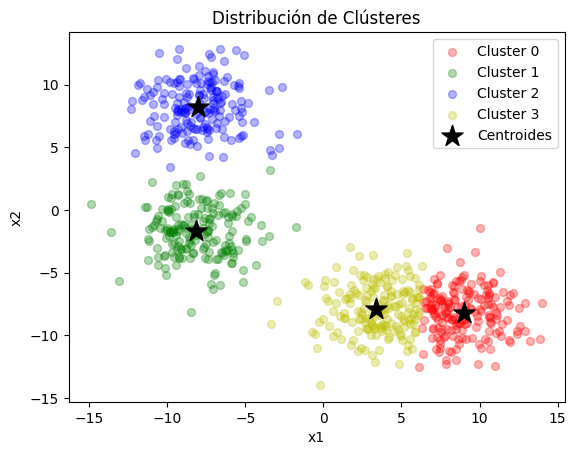

In [168]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]

plt.scatter(df1['x1'], df1['x2'], label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2['x1'], df2['x2'], label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3['x1'], df3['x2'], label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)
plt.scatter(df4['x1'], df4['x2'], label='Cluster 3', c='y', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='Centroides', s=256)

plt.title('Distribución de Clústeres')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response:

Si se mostro algo como lo que pensaba que iba a suceder, puede ser que en este caso haya solo 3 clusters pero en los siguientes se tiene maximo de 4 visibles por lo que decidi ponerle 4.

Aun asi se observa bien la distincion entre los 4.

## d) Elbow plot

Compute the Elbow plot

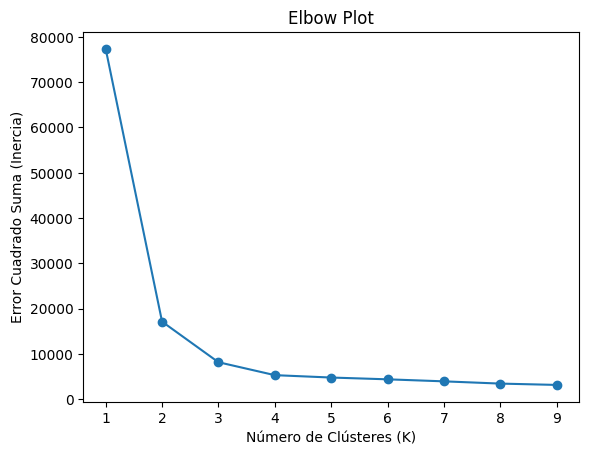

In [169]:
sse = []

k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    km.fit_predict(df[['x1', 'x2']])
    sse.append(km.inertia_)

plt.plot(k_rng, sse, marker='o')

plt.title('Elbow Plot')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Error Cuadrado Suma (Inercia)')
plt.show()


### Questions

What is the best number of clusters K? (argue your response)

Your response: 3 ya que el cambio entre 3 y 4 no es muy significante por lo que nos podriamos quedar con el 3.


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: No, yo pensaba que lo ideal era 4 pero ahora veo que si debia haber utilizado 3.


# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [170]:
from sklearn.datasets import load_digits

digits_data = load_digits()
digits = pd.DataFrame(digits_data.data)
print(digits.head())

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


2) Plot some of the observations (add in the title the label/digit of that obserbation)

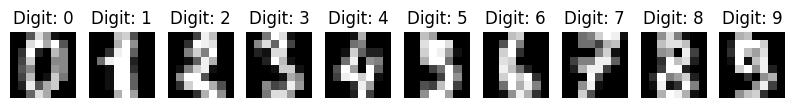

In [171]:
n_images = 10

fig, axes = plt.subplots(1, n_images, figsize=(10, 5))

for i in range(n_images):
    image = digits.iloc[i].values.reshape(8, 8)
    label = digits_data.target[i]
    
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Digit: {label}')
    axes[i].axis('off')

plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [172]:
num_clusters = 10

# KMeans usando todas las características (64 píxeles)
km_all = KMeans(n_clusters=num_clusters, n_init="auto", random_state=42)
yp_all = km_all.fit_predict(digits)

# KMeans usando solo la primera fila de píxeles (columnas 0 a 7)
km_1row = KMeans(n_clusters=num_clusters, n_init="auto", random_state=42)
yp_1row = km_1row.fit_predict(digits.iloc[:, :8])

# KMeans usando solo la cuarta fila de píxeles (columnas 24 a 31)
km_4row = KMeans(n_clusters=num_clusters, n_init="auto", random_state=42)
yp_4row = km_4row.fit_predict(digits.iloc[:, 24:32])

# KMeans usando solo la octava fila de píxeles (columnas 56 a 63)
km_8row = KMeans(n_clusters=num_clusters, n_init="auto", random_state=42)
yp_8row = km_8row.fit_predict(digits.iloc[:, 56:64])

# Resultados
print("Clusters Todas Las Características:", yp_all[:10])
print("Clusters Primera Fila:", yp_1row[:10])
print("Clusters Cuarta Fila:", yp_4row[:10])
print("Clusters Octava Fila:", yp_8row[:10])

Clusters Todas Las Características: [5 7 7 6 4 9 2 0 8 9]
Clusters Primera Fila: [2 9 3 1 5 4 9 0 1 4]
Clusters Cuarta Fila: [8 1 7 3 9 1 4 0 6 5]
Clusters Octava Fila: [3 5 6 5 0 1 5 2 1 7]


4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

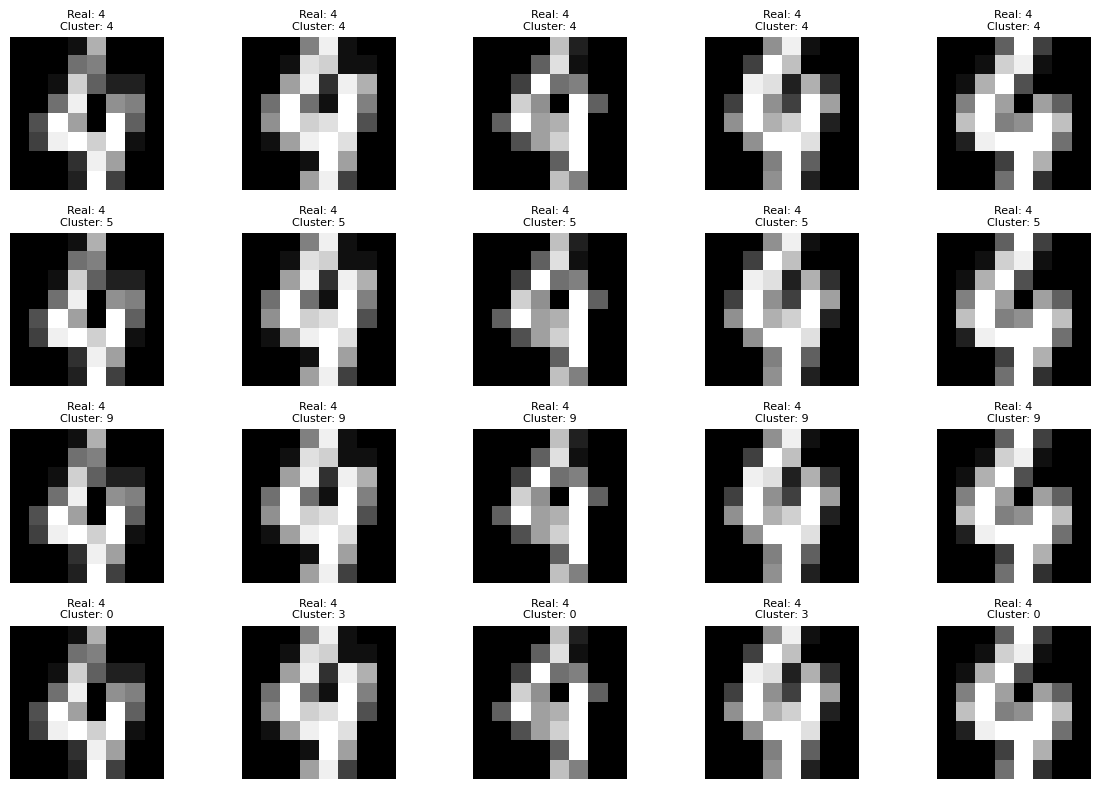

In [180]:
# Digit a revisar
digit_to_check = 4
indices = np.nonzero(digits_data.target == digit_to_check)[0][:5]  # Tomar 5 imágenes del dígito

# Crear subplots 4 filas (un modelo por fila) x N imágenes
fig, axes = plt.subplots(4, len(indices), figsize=(12, 8))

# Nombres de los modelos para etiquetar cada fila
model_names = ['KMeans All Features', 'KMeans First Row', 'KMeans Fourth Row', 'KMeans Eighth Row']
predictions = [yp_all, yp_1row, yp_4row, yp_8row]

# Iterar sobre los modelos y las imágenes seleccionadas
for row, (name, yp) in enumerate(zip(model_names, predictions)):
    for col, idx in enumerate(indices):
        image = digits.iloc[idx].values.reshape(8, 8)
        real_label = digits_data.target[idx]
        estimated_cluster = yp[idx]

        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(f'Real: {real_label}\nCluster: {estimated_cluster}', fontsize=8)
        axes[row, col].axis('off')

    axes[row, 0].set_ylabel(name, fontsize=10)  # Etiqueta en el eje Y con el modelo

plt.tight_layout()
plt.show()

5) Compute the Elbow plot

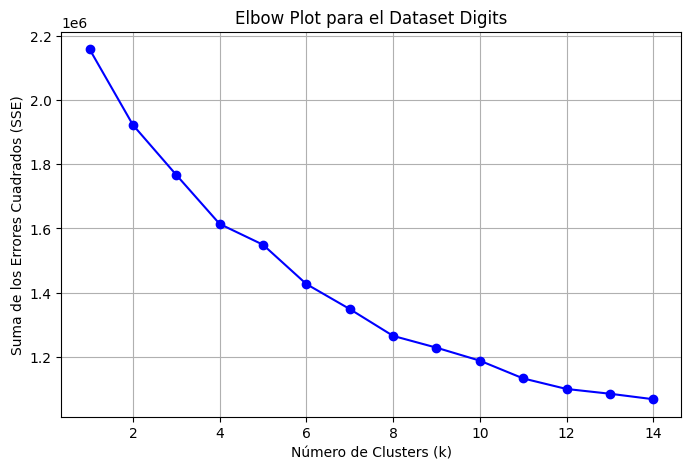

In [175]:
sse = []

k_range = range(1, 15)

for k in k_range:
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    km.fit(digits)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de los Errores Cuadrados (SSE)')
plt.title('Elbow Plot para el Dataset Digits')
plt.grid()
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

La agrupacion con mejores resultados fue la de KmeansAll, esto puede ser debido a que se utilizaron los 64 píxeles para realizar el clustering, esto se debe a que el modelo tiene acceso a toda la información de cada imagen, permitiéndole encontrar patrones más precisos y separar mejor los dígitos en distintos clusters.

Aunque jugando con los numeros para observar cual se acercaba mas pude notar que en algunos numeros se pensaba al 100% que era otro numero por lo cual tambien le juega en contra tener tanta informacion en otros casos.

# PART 3
## Do classification using the "digits" dataset

3) Split the dataset in train and test

In [181]:
from sklearn.model_selection import train_test_split

X = digits_data.data
y = digits_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [192]:
from sklearn.svm import SVC

# ClassifierAll: Usando todas las 64 características
svm_all = SVC(kernel='linear', random_state=42)
svm_all.fit(X_train, y_train)

# Classifier1col: Usando solo las 8 características de la primera columna
X_train_1col = X_train[:, :8]  # Primeras 8 columnas
X_test_1col = X_test[:, :8]    # Primeras 8 columnas
svm_1col = SVC(kernel='linear', random_state=42)
svm_1col.fit(X_train_1col, y_train)

# Classifier4col: Usando solo las 8 características de la cuarta columna
X_train_4col = X_train[:, 24:32]  # Columnas 24 a 32 (cuarta fila)
X_test_4col = X_test[:, 24:32]    # Columnas 24 a 32 (cuarta fila)
svm_4col = SVC(kernel='linear', random_state=42)
svm_4col.fit(X_train_4col, y_train)

# Classifier8col: Usando solo las 8 características de la octava columna
X_train_8col = X_train[:, 56:64]  # Columnas 56 a 64 (octava fila)
X_test_8col = X_test[:, 56:64]    # Columnas 56 a 64 (octava fila)
svm_8col = SVC(kernel='linear', random_state=42)
svm_8col.fit(X_train_8col, y_train)

SVC(kernel='linear', random_state=42)

5) Make predictions (use the test set)

In [193]:
from sklearn.metrics import accuracy_score

# Predicciones con el clasificador usando todas las 64 características
y_pred_all = svm_all.predict(X_test)

# Predicciones con el clasificador usando solo las 8 características de la primera columna
y_pred_1col = svm_1col.predict(X_test_1col)

# Predicciones con el clasificador usando solo las 8 características de la cuarta columna
y_pred_4col = svm_4col.predict(X_test_4col)

# Predicciones con el clasificador usando solo las 8 características de la octava columna
y_pred_8col = svm_8col.predict(X_test_8col)

# Evaluar el desempeño de cada clasificador
accuracy_all = accuracy_score(y_test, y_pred_all)
accuracy_1col = accuracy_score(y_test, y_pred_1col)
accuracy_4col = accuracy_score(y_test, y_pred_4col)
accuracy_8col = accuracy_score(y_test, y_pred_8col)

# Imprimir los resultados
print(f'Accuracy using all 64 features: {(accuracy_all * 100):.2f}%')
print(f'Accuracy using only the first 8 features: {(accuracy_1col * 100):.2f}%')
print(f'Accuracy using only the fourth 8 features: {(accuracy_4col * 100):.2f}%')
print(f'Accuracy using only the eighth 8 features: {(accuracy_8col * 100):.2f}%')

Accuracy using all 64 features: 97.78%
Accuracy using only the first 8 features: 41.11%
Accuracy using only the fourth 8 features: 62.50%
Accuracy using only the eighth 8 features: 49.72%


6) Compute performance metrics

In [194]:
from sklearn.metrics import confusion_matrix

# Calcular las predicciones para cada modelo en el conjunto de prueba (test set)
y_pred_all = svm_all.predict(X_test)
y_pred_1col = svm_1col.predict(X_test_1col)
y_pred_4col = svm_4col.predict(X_test_4col)
y_pred_8col = svm_8col.predict(X_test_8col)

# Calcular la matriz de confusión para cada clasificador
conf_matrix_all = confusion_matrix(y_test, y_pred_all)
conf_matrix_1col = confusion_matrix(y_test, y_pred_1col)
conf_matrix_4col = confusion_matrix(y_test, y_pred_4col)
conf_matrix_8col = confusion_matrix(y_test, y_pred_8col)

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

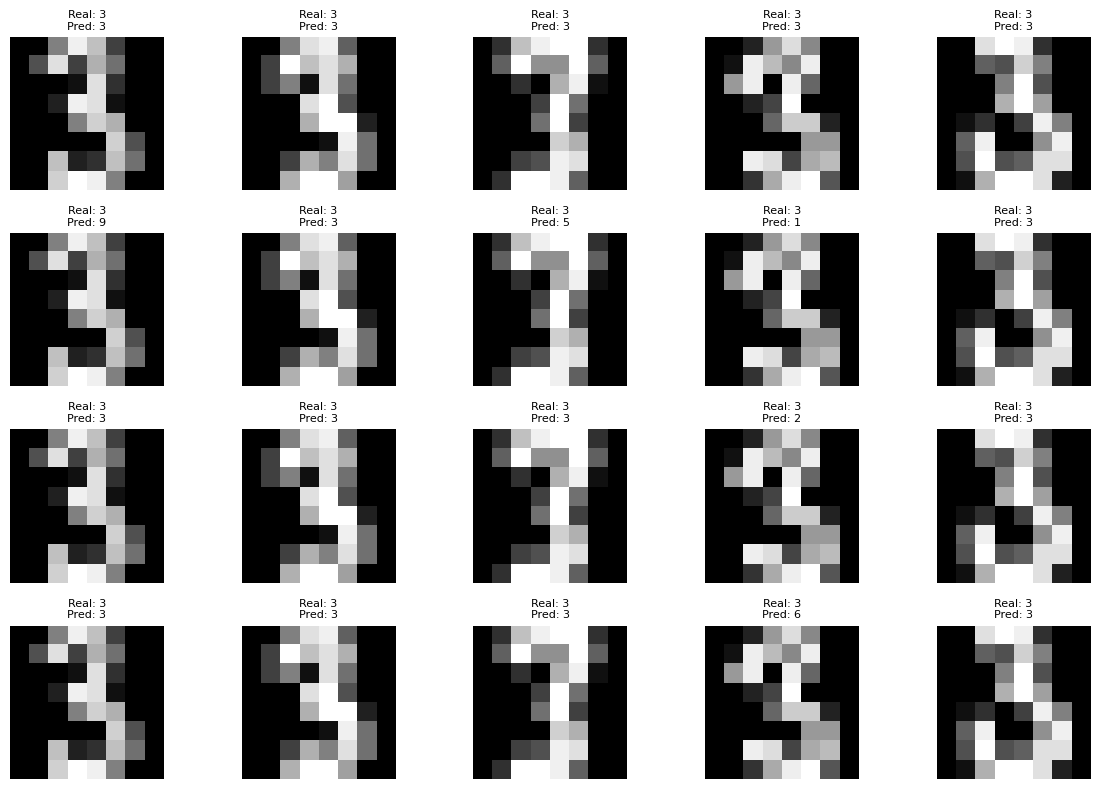

In [200]:
digit_to_check = 3

# Encuentra las imágenes del dígito seleccionado en el conjunto de test
indices = np.nonzero(y_test == digit_to_check)[0][:5]  # Los primeros 5 índices donde la etiqueta es 3

# Crear un gráfico con subplots 4 filas (un clasificador por fila) x N imágenes
fig, axes = plt.subplots(4, len(indices), figsize=(12, 8))

# Nombres de los clasificadores para etiquetar cada fila
model_names = ['ClassifierAll', 'Classifier1col', 'Classifier4col', 'Classifier8col']
models = [svm_all, svm_1col, svm_4col, svm_8col]
predictions = [
    svm_all.predict(X_test),
    svm_1col.predict(X_test[:, :8]),
    svm_4col.predict(X_test[:, 24:32]),
    svm_8col.predict(X_test[:, 56:64])
]

# Iterar sobre los modelos y las imágenes seleccionadas
for row, (name, model, yp) in enumerate(zip(model_names, models, predictions)):
    for col, idx in enumerate(indices):
        image = X_test[idx].reshape(8, 8)  # Redimensionar la imagen
        real_label = y_test[idx]  # Etiqueta real del dígito
        estimated_label = yp[idx]  # Predicción del modelo

        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(f'Real: {real_label}\nPred: {estimated_label}', fontsize=8)
        axes[row, col].axis('off')

    axes[row, 0].set_ylabel(name, fontsize=10)  # Etiqueta en el eje Y con el modelo

plt.tight_layout()
plt.show()


### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

Al igual que anteriormente el modelo ClassifierAll es el que tuvo mejores resultados debido a que esta utilizando todos los datos
para alimentarse y poder hacer las predicciones, esto lo podemos observar al hacer los test de predicciones el cual nos arroja una efectividad del 97.78% demostrando superioridad a los otros modelos igualmente al hacer los plots podemos observar que fue el unico que tuvo el 100% de aciertos.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Logre interpretar los datos de muestras en problema muy utilizados como en otros datos de muestra gracias a las lecciones desarrolladas a lo largo de esta semana tec, al igual que aprendi nuevos conceptos que anteriormente no tenia claros.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Soy capaz de construir modelos bivariados gracias a las lecciones impartidas en la semana tec desarrollando modelos supervisados y observando sus resultados para asegurar su efectividad.